<a href="https://colab.research.google.com/github/manvikhanna654/task_8_K_Means/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Mall_Customers.xls to Mall_Customers.xls

📁 File Uploaded: Mall_Customers.xls

📊 Available columns in the dataset:
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


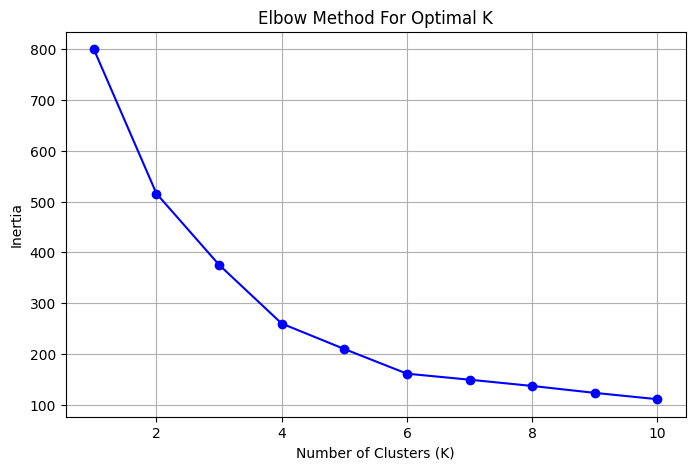

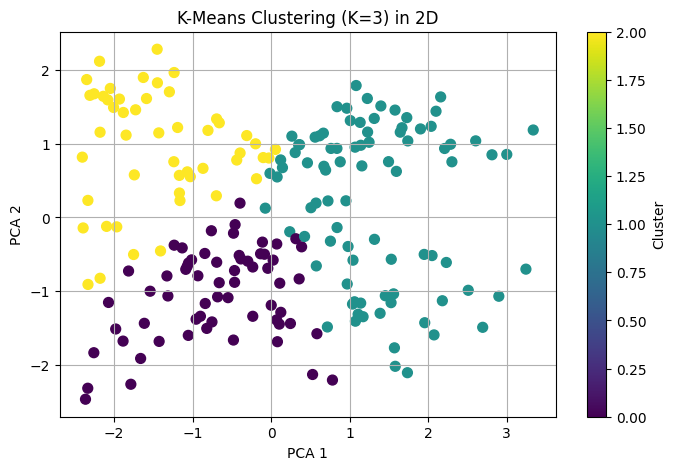


⭐ Silhouette Score for K=3: 0.337


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from google.colab import files


uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"\n📁 File Uploaded: {filename}")


df = pd.read_csv(filename)
df.columns = df.columns.str.strip()
print("\n📊 Available columns in the dataset:")
print(df.columns.tolist())


df = df.dropna()


numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_features]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_scaled)


df['Cluster'] = clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title(f'K-Means Clustering (K={optimal_k}) in 2D')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


score = silhouette_score(X_scaled, clusters)
print(f"\n⭐ Silhouette Score for K={optimal_k}: {score:.3f}")
